In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv("studydata.csv")

# Create 'totalscore' column
df['totalscore'] = df['math_score'] + df['reading_score'] + df['writing_score']

# Calculate percentiles
percentiles = df['totalscore'].quantile([0.25, 0.4, 0.7])

# Function to assign division based on percentile
def assign_division(score):
    if score > percentiles[0.7]:
        return 'First Division'
    elif score > percentiles[0.4]:
        return 'Second Division'
    elif score > percentiles[0.25]:
        return 'Third Division'
    else:
        return 'Fail'

# Create 'division' column
df['division'] = df['totalscore'].apply(assign_division)

# Display the updated DataFrame
df.head()


,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,totalscore,division
0,female,group B,bachelor's degree,standard,none,72,72,74,218,Second Division
1,female,group C,some college,standard,completed,69,90,88,247,First Division
2,female,group B,master's degree,standard,none,90,95,93,278,First Division
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,Fail
4,male,group C,some college,standard,none,76,78,75,229,First Division


In [2]:
# Perform one-hot encoding on categorical variables
df_encoded = pd.get_dummies(df, columns=['gender', 'test_preparation_course', 'lunch'])

# Display the updated DataFrame
df_encoded.head()


,race_ethnicity,parental_level_of_education,math_score,reading_score,writing_score,totalscore,division,gender_female,gender_male,test_preparation_course_completed,test_preparation_course_none,lunch_free/reduced,lunch_standard
0,group B,bachelor's degree,72,72,74,218,Second Division,1,0,0,1,0,1
1,group C,some college,69,90,88,247,First Division,1,0,1,0,0,1
2,group B,master's degree,90,95,93,278,First Division,1,0,0,1,0,1
3,group A,associate's degree,47,57,44,148,Fail,0,1,0,1,1,0
4,group C,some college,76,78,75,229,First Division,0,1,0,1,0,1


In [3]:
# Define predictor variables and target variable
predictors = df_encoded[['gender_female', 'gender_male', 
                         'test_preparation_course_completed', 'test_preparation_course_none', 
                         'lunch_free/reduced', 'lunch_standard']]
target = df_encoded['division']

# Display the predictor variables and target variable
print("Predictor Variables:")
print(predictors.head())
print("\nTarget Variable:")
print(target.head())


Predictor Variables:
   gender_female  gender_male  test_preparation_course_completed  \
0              1            0                                  0   
1              1            0                                  1   
2              1            0                                  0   
3              0            1                                  0   
4              0            1                                  0   

   test_preparation_course_none  lunch_free/reduced  lunch_standard  
0                             1                   0               1  
1                             0                   0               1  
2                             1                   0               1  
3                             1                   1               0  
4                             1                   0               1  

Target Variable:
0    Second Division
1     First Division
2     First Division
3               Fail
4     First Division
Name: division, dtype: obje

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(predictors, target, test_size=0.2, random_state=42)

# Train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_train_pred = rf_model.predict(X_train)
y_test_pred = rf_model.predict(X_test)

# Evaluate the model
print("Accuracy on Train Dataset:", accuracy_score(y_train, y_train_pred))
print("Accuracy on Test Dataset:", accuracy_score(y_test, y_test_pred))
print("\nClassification Report on Test Dataset:")
print(classification_report(y_test, y_test_pred))
print("\nConfusion Matrix on Test Dataset:")
print(confusion_matrix(y_test, y_test_pred))


Accuracy on Train Dataset: 0.3975
Accuracy on Test Dataset: 0.375

Classification Report on Test Dataset:
                 precision    recall  f1-score   support

           Fail       0.40      0.60      0.48        58
 First Division       0.47      0.40      0.43        58
Second Division       0.27      0.31      0.29        55
 Third Division       0.00      0.00      0.00        29

       accuracy                           0.38       200
      macro avg       0.28      0.33      0.30       200
   weighted avg       0.33      0.38      0.34       200


Confusion Matrix on Test Dataset:
[[35  4 19  0]
 [17 23 18  0]
 [20 18 17  0]
 [16  4  9  0]]


C:\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


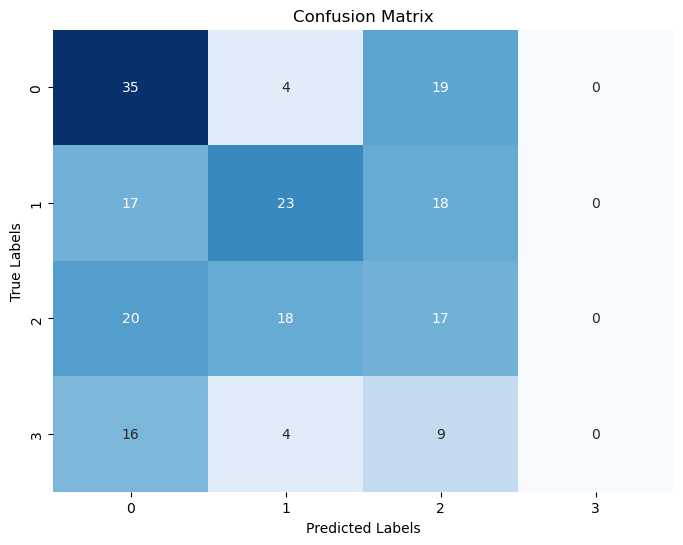

Accuracy: 0.375


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)

# Plot confusion matrix as heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Print accuracy score
accuracy = accuracy_score(y_test, y_test_pred)
print("Accuracy:", accuracy)


In [6]:
from sklearn.metrics import accuracy_score

# Calculate accuracy on train set
train_accuracy = accuracy_score(y_train, y_train_pred)
print("Accuracy on Train Set:", train_accuracy)

# Calculate accuracy on test set
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Accuracy on Test Set:", test_accuracy)


Accuracy on Train Set: 0.3975
Accuracy on Test Set: 0.375


In [7]:
# Perform one-hot encoding on categorical variables
df_encoded = pd.get_dummies(df, columns=['race_ethnicity', 'parental_level_of_education'])

# Display the updated DataFrame
df_encoded.head()


,gender,lunch,test_preparation_course,math_score,reading_score,writing_score,totalscore,division,race_ethnicity_group A,race_ethnicity_group B,race_ethnicity_group C,race_ethnicity_group D,race_ethnicity_group E,parental_level_of_education_associate's degree,parental_level_of_education_bachelor's degree,parental_level_of_education_high school,parental_level_of_education_master's degree,parental_level_of_education_some college,parental_level_of_education_some high school
0,female,standard,none,72,72,74,218,Second Division,0,1,0,0,0,0,1,0,0,0,0
1,female,standard,completed,69,90,88,247,First Division,0,0,1,0,0,0,0,0,0,1,0
2,female,standard,none,90,95,93,278,First Division,0,1,0,0,0,0,0,0,1,0,0
3,male,free/reduced,none,47,57,44,148,Fail,1,0,0,0,0,1,0,0,0,0,0
4,male,standard,none,76,78,75,229,First Division,0,0,1,0,0,0,0,0,0,1,0


In [8]:
# Define predictor variables and target variable
predictors = df_encoded.drop(['gender', 'lunch', 'test_preparation_course', 'math_score', 'reading_score', 'writing_score', 'totalscore', 'division'], axis=1)
target = df_encoded['division']

# Display the predictor variables and target variable
print("Predictor Variables:")
print(predictors.head())
print("\nTarget Variable:")
print(target.head())


Predictor Variables:
   race_ethnicity_group A  race_ethnicity_group B  race_ethnicity_group C  \
0                       0                       1                       0   
1                       0                       0                       1   
2                       0                       1                       0   
3                       1                       0                       0   
4                       0                       0                       1   

   race_ethnicity_group D  race_ethnicity_group E  \
0                       0                       0   
1                       0                       0   
2                       0                       0   
3                       0                       0   
4                       0                       0   

   parental_level_of_education_associate's degree  \
0                                               0   
1                                               0   
2                                     

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(predictors, target, test_size=0.2, random_state=42)

# Train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_train_pred = rf_model.predict(X_train)
y_test_pred = rf_model.predict(X_test)

# Evaluate the model
print("Accuracy on Train Dataset:", accuracy_score(y_train, y_train_pred))
print("Accuracy on Test Dataset:", accuracy_score(y_test, y_test_pred))
print("\nClassification Report on Test Dataset:")
print(classification_report(y_test, y_test_pred))
print("\nConfusion Matrix on Test Dataset:")
print(confusion_matrix(y_test, y_test_pred))


Accuracy on Train Dataset: 0.3825
Accuracy on Test Dataset: 0.29

Classification Report on Test Dataset:
                 precision    recall  f1-score   support

           Fail       0.24      0.16      0.19        58
 First Division       0.34      0.48      0.40        58
Second Division       0.26      0.38      0.31        55
 Third Division       0.00      0.00      0.00        29

       accuracy                           0.29       200
      macro avg       0.21      0.25      0.22       200
   weighted avg       0.24      0.29      0.26       200


Confusion Matrix on Test Dataset:
[[ 9 24 25  0]
 [ 9 28 21  0]
 [10 24 21  0]
 [ 9  7 13  0]]


C:\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


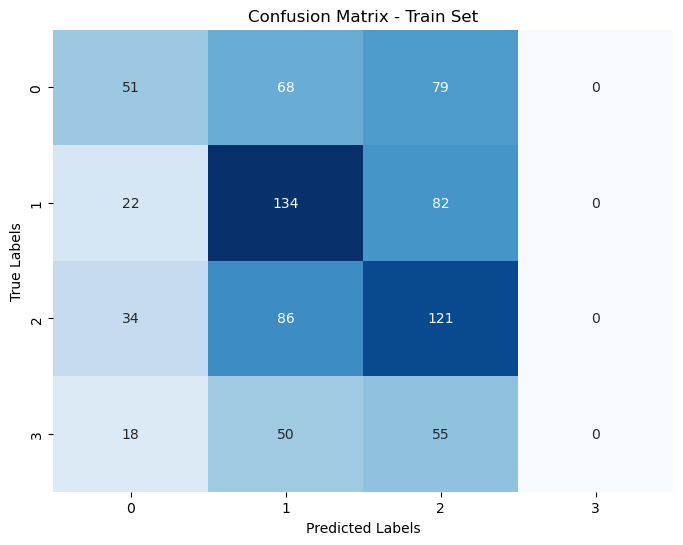

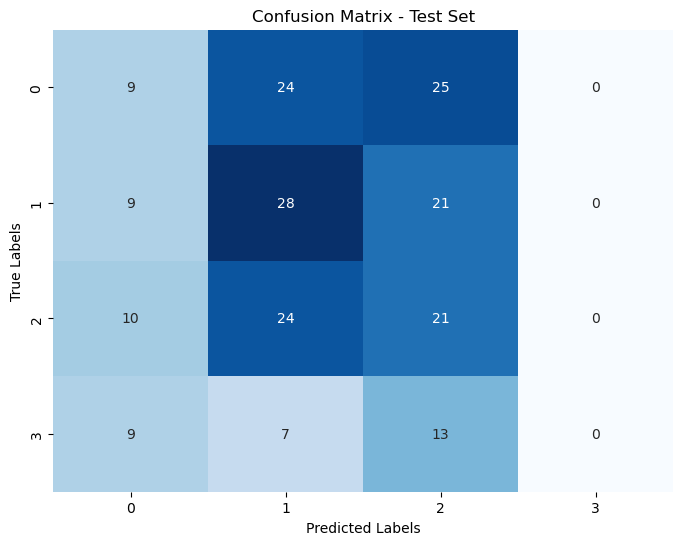

Accuracy on Train Dataset: 0.3825
Accuracy on Test Dataset: 0.29


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score

# Calculate confusion matrix for train set
conf_matrix_train = confusion_matrix(y_train, y_train_pred)

# Plot confusion matrix for train set as heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_train, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Train Set')
plt.show()

# Calculate confusion matrix for test set
conf_matrix_test = confusion_matrix(y_test, y_test_pred)

# Plot confusion matrix for test set as heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Test Set')
plt.show()

# Calculate accuracy on train and test sets
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Print accuracy on train and test sets
print("Accuracy on Train Dataset:", train_accuracy)
print("Accuracy on Test Dataset:", test_accuracy)


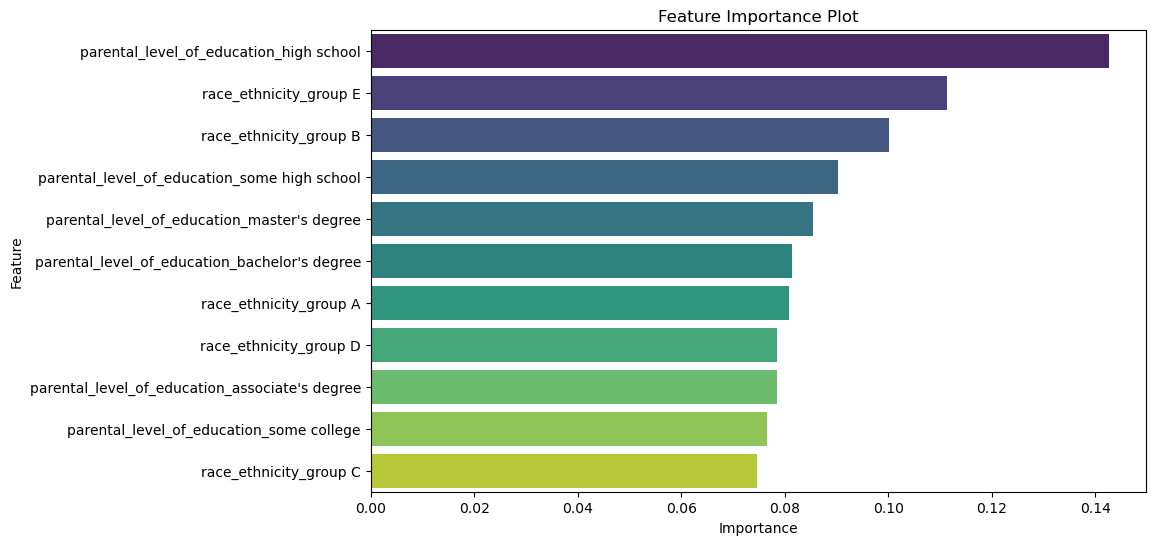

In [11]:
# Get feature importances
feature_importances = rf_model.feature_importances_

# Get feature names
feature_names = predictors.columns

# Create a DataFrame to store feature importances
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance Plot')
plt.show()
